In [309]:
# TODO
# Add more predictors like director and runtime
# feature transformation, polynomials, etc.
# normalize features
# Director with past ratings spread
# Get summary stats of regression
# residual plot
# plot resids vs. best factor to see if there is heteroskedasticity
# histogram of features to see if transformations necessary
# Regularized Regresssion


In [352]:
import pandas as pd
import numpy as np
from patsy import dmatrices

In [353]:
data = pd.read_csv("mergedmoviesdata.csv")
data.shape

(18011, 7)

In [354]:
data.head(10)

,Unnamed: 0,ID,Genre,Rating,Review,Metascore,Budget
0,0,tt2346170,Horror,NaN,5.6,NaN,30000.0
1,1,tt3120962,"Biography, Comedy, Fantasy",NaN,NaN,NaN,NaN
2,2,tt3184026,"Drama, Thriller",NaN,4.7,NaN,NaN
3,3,tt2332503,Romance,NaN,5.2,NaN,NaN
4,4,tt1638308,Family,NaN,7.7,NaN,NaN
5,5,tt2787556,Drama,NaN,5.8,NaN,NaN
6,6,tt2777190,"Drama, Family, Fantasy",NaN,6.4,NaN,1000.0
7,7,tt2794792,Comedy,NaN,3.5,NaN,NaN
8,8,tt2771006,"Action, Comedy, Horror",NaN,NaN,NaN,50000.0
9,9,tt2395385,"Sci-Fi, Thriller",NaN,5.5,60.0,NaN


In [355]:
data = data.drop('Unnamed: 0', 1)

In [357]:
data.dtypes

ID           object
Genre        object
Rating       object
Review       object
Metascore    object
Budget       object
dtype: object

In [365]:
data.head()

,ID,Genre,Rating,Review,Metascore,Budget
34,tt2024544,"Biography, Drama, History",R,8.1,97.0,20000000.0
56,tt1272878,"Action, Comedy, Crime, Drama, Thriller",R,6.8,55.0,61000000.0
68,tt1711425,Comedy,R,5.9,34.0,13000000.0
100,tt0453562,"Biography, Drama, Sport",PG-13,7.5,62.0,40000000.0
103,tt1335975,"Action, Adventure, Drama, Fantasy",PG-13,6.3,28.0,175000000.0


In [366]:
data.isnull().any().any()

False

In [367]:
data = data.dropna()

In [368]:
data.isnull().any().any()

False

In [369]:
data.shape

(367, 6)

In [370]:
data.columns.values.tolist()

['ID', 'Genre', 'Rating', 'Review', 'Metascore', 'Budget']

In [371]:
data.dtypes

ID           object
Genre        object
Rating       object
Review       object
Metascore    object
Budget       object
dtype: object

In [374]:
pd.unique(data.Review.ravel())

array(['8.1', '6.8', '5.9', '7.5', '6.3', '5.3', '5.1', '5.2', '5.7',
       '6.2', '4.9', '6.9', '7.3', '6.4', '6.5', '6.7', '5.0', '5.5',
       '7.4', '7.9', '6.0', '5.4', '8.0', '6.6', '7.2', '7.1', '7.7',
       '5.8', '4.4', '6.1', '4.8', '4.2', '7.6', '7.0', '5.6', '7.8',
       '4.6', '8.2', '3.5', '3.9', 'Review', '4.7', '4.0', '4.3', '8.7',
       '2.8', '3.1', '8.6'], dtype=object)

In [375]:
data = data[data.Review != "Review"]

In [376]:
pd.unique(data.Review.ravel())

array(['8.1', '6.8', '5.9', '7.5', '6.3', '5.3', '5.1', '5.2', '5.7',
       '6.2', '4.9', '6.9', '7.3', '6.4', '6.5', '6.7', '5.0', '5.5',
       '7.4', '7.9', '6.0', '5.4', '8.0', '6.6', '7.2', '7.1', '7.7',
       '5.8', '4.4', '6.1', '4.8', '4.2', '7.6', '7.0', '5.6', '7.8',
       '4.6', '8.2', '3.5', '3.9', '4.7', '4.0', '4.3', '8.7', '2.8',
       '3.1', '8.6'], dtype=object)

In [377]:
for index, row in data.iterrows():
    genres = row['Genre'].replace(",","").split()
    for genre in genres:
        print genre
        if genre in data.columns.values.tolist():
            data.set_value(index, genre, 1.0)
        else:
            data[genre] = pd.Series(0, index = data.index)
            data.set_value(index, genre, 1.0)

Biography
Drama
History
Action
Comedy
Crime
Drama
Thriller
Comedy
Biography
Drama
Sport
Action
Adventure
Drama
Fantasy
Action
Crime
Thriller
Comedy
Horror
Drama
Comedy
Drama
Romance
Drama
Romance
Action
Adventure
Sci-Fi
Action
Adventure
Drama
Crime
Drama
Comedy
Comedy
Romance
Drama
Comedy
Drama
Comedy
Horror
Thriller
Music
Drama
Fantasy
Romance
Drama
Romance
Crime
Drama
Thriller
Drama
Crime
Drama
Thriller
Drama
Music
Biography
Drama
Thriller
Drama
Horror
Drama
Biography
Drama
Horror
Sci-Fi
Thriller
Drama
Comedy
Drama
Animation
Comedy
Family
Biography
Drama
Romance
Comedy
Drama
Romance
Action
Drama
Sci-Fi
Thriller
Action
Sci-Fi
Action
Thriller
Animation
Adventure
Family
Fantasy
Action
Mystery
Thriller
Animation
Adventure
Comedy
Family
Sci-Fi
Horror
Action
Crime
Thriller
Comedy
Crime
Drama
Animation
Adventure
Comedy
Family
Animation
Adventure
Comedy
Family
Fantasy
Musical
Action
Adventure
Sci-Fi
Thriller
Action
Crime
Drama
Thriller
Action
Crime
Thriller
Drama
Sci-Fi
Thriller
Comedy
Comed

In [378]:
data.tail(10)

,ID,Genre,Rating,Review,Metascore,Budget,Biography,Drama,History,Action,...,Horror,Romance,Sci-Fi,Music,Animation,Family,Mystery,Musical,War,Western
17366,tt1809398,"Biography, Drama, Sport, War",PG-13,7.2,59.0,65000000.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
17397,tt3713166,"Horror, Thriller",R,5.9,59.0,1000000.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17511,tt2771372,"Crime, Drama, Mystery, Thriller",PG-13,6.8,62.0,6000000.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17722,tt2247476,"Drama, Sport",PG,6.6,41.0,15000000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17741,tt1791682,"Comedy, Drama",R,6.5,76.0,10000000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17742,tt2582802,"Drama, Music",R,8.6,88.0,3300000.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17793,tt1837709,"Drama, Fantasy, Mystery, Romance",PG-13,6.2,31.0,60000000.0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
17800,tt2870708,"Comedy, Drama",R,6.7,43.0,6000000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17819,tt1403241,"Action, Horror",R,5.2,37.0,18000000.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
17852,tt1877832,"Action, Adventure, Sci-Fi, Thriller",PG-,8.1,74.0,200000000.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [379]:
data.dtypes

ID           object
Genre        object
Rating       object
Review       object
Metascore    object
Budget       object
Biography     int64
Drama         int64
History       int64
Action        int64
Comedy        int64
Crime         int64
Thriller      int64
Sport         int64
Adventure     int64
Fantasy       int64
Horror        int64
Romance       int64
Sci-Fi        int64
Music         int64
Animation     int64
Family        int64
Mystery       int64
Musical       int64
War           int64
Western       int64
dtype: object

In [380]:
data.isnull().any().any()

False

In [381]:
data.dtypes

ID           object
Genre        object
Rating       object
Review       object
Metascore    object
Budget       object
Biography     int64
Drama         int64
History       int64
Action        int64
Comedy        int64
Crime         int64
Thriller      int64
Sport         int64
Adventure     int64
Fantasy       int64
Horror        int64
Romance       int64
Sci-Fi        int64
Music         int64
Animation     int64
Family        int64
Mystery       int64
Musical       int64
War           int64
Western       int64
dtype: object

In [382]:
data = data.drop('ID', 1)

In [383]:
data = data.drop('Genre', 1)

In [384]:
data.head(5)

,Rating,Review,Metascore,Budget,Biography,Drama,History,Action,Comedy,Crime,...,Horror,Romance,Sci-Fi,Music,Animation,Family,Mystery,Musical,War,Western
34,R,8.1,97.0,20000000.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,R,6.8,55.0,61000000.0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
68,R,5.9,34.0,13000000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100,PG-13,7.5,62.0,40000000.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,PG-13,6.3,28.0,175000000.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
import matplotlib.pylab as plt
import seaborn as sns

In [386]:
data.isnull().any().any()

False

In [387]:
#data.Rating = data.Rating.astype(str)
#data.Review = data.Review.astype(float)
#data.Metascore = data.Metascore.astype(float)
#data.Budget = data.Budget.astype(float)
data['Review'] = data['Review'].convert_objects(convert_numeric=True)
data['Metascore'] = data['Metascore'].convert_objects(convert_numeric=True)
data['Budget'] = data['Budget'].convert_objects(convert_numeric=True)

In [388]:
data.isnull().any().any()

False

In [389]:
data.dtypes

Rating        object
Review       float64
Metascore    float64
Budget       float64
Biography      int64
Drama          int64
History        int64
Action         int64
Comedy         int64
Crime          int64
Thriller       int64
Sport          int64
Adventure      int64
Fantasy        int64
Horror         int64
Romance        int64
Sci-Fi         int64
Music          int64
Animation      int64
Family         int64
Mystery        int64
Musical        int64
War            int64
Western        int64
dtype: object

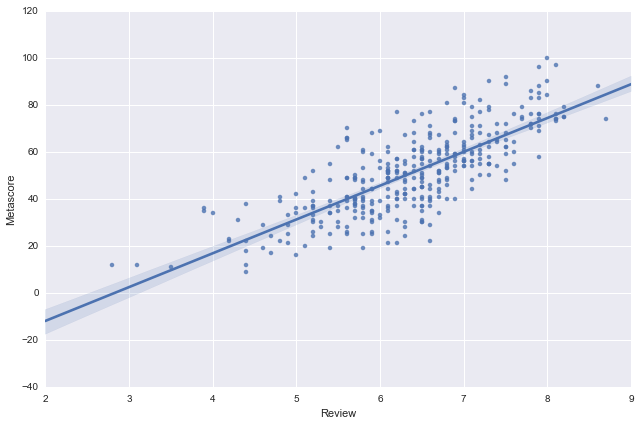

In [438]:
sns.pairplot(data, x_vars=['Review'],y_vars=['Metascore'],size=6, aspect=1.5, kind='reg')

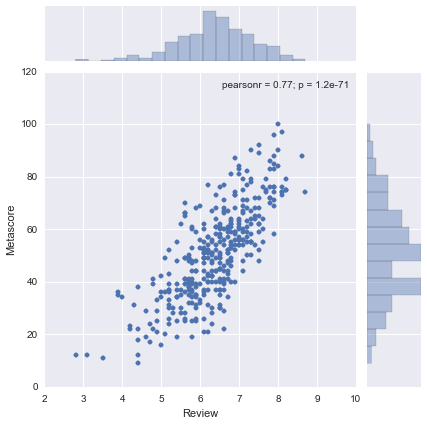

In [440]:
sns.jointplot(data=data, x='Review',y='Metascore')

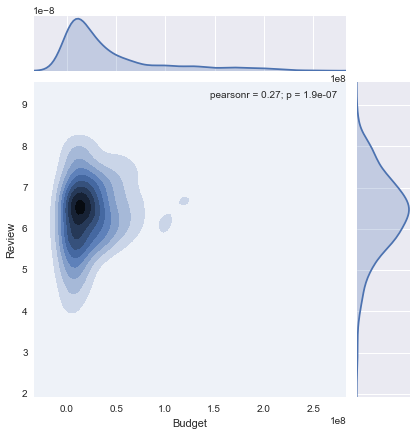

In [392]:
sns.jointplot(x="Budget", y="Review", data=data, kind="kde");

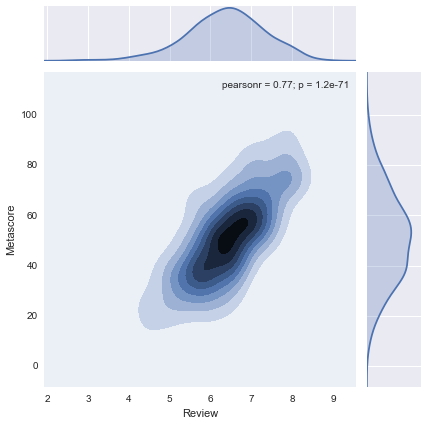

In [393]:
sns.jointplot(x="Review", y="Metascore", data=data, kind="kde");

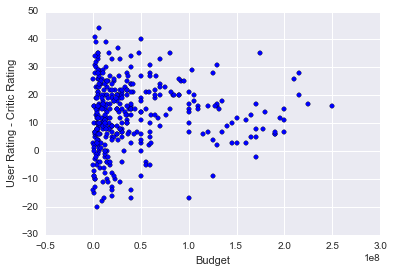

In [436]:
%matplotlib inline
plt.scatter(data.Budget,data.Review*10-data.Metascore)
plt.xlabel("Budget")
plt.ylabel("User Rating - Critic Rating")

In [395]:
data.isnull().any().any()

False

In [396]:
type(data['Biography'].iloc[0])

numpy.int64

In [397]:
feature_cols=['Rating',
 'Budget',
 'Comedy',
 'Horror',
 'Thriller',
 'Action',
 'Crime',
 'Drama',
 'Fantasy',
 'War',
 'Western',
 'Mystery',
 'Romance',
 'Family',
 'Biography',
 'History',
 'Musical',
 'Sci-Fi',
 'Music',
 'Animation',
 'Adventure',
 'Sport']

In [398]:
X = data[feature_cols]
X.head(5)

,Rating,Budget,Comedy,Horror,Thriller,Action,Crime,Drama,Fantasy,War,...,Romance,Family,Biography,History,Musical,Sci-Fi,Music,Animation,Adventure,Sport
34,R,20000000,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
56,R,61000000,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68,R,13000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,PG-13,40000000,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
103,PG-13,175000000,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [399]:
data.isnull().any().any()

False

In [400]:
y = data.Review * 10 - data.Metascore

In [401]:
print type(y)
y.head(5)

<class 'pandas.core.series.Series'>


34    -16
56     13
68     25
100    13
103    35
dtype: float64

In [402]:
data.head()

,Rating,Review,Metascore,Budget,Biography,Drama,History,Action,Comedy,Crime,...,Horror,Romance,Sci-Fi,Music,Animation,Family,Mystery,Musical,War,Western
34,R,8.1,97,20000000,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,R,6.8,55,61000000,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
68,R,5.9,34,13000000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100,PG-13,7.5,62,40000000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,PG-13,6.3,28,175000000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [403]:
data["AudienceMinusMetacore"] = pd.Series(0, index = data.index)
data['AudienceMinusMetacore'] = data.Review * 10 - data.Metascore

In [404]:
data.columns.values.tolist()

['Rating',
 'Review',
 'Metascore',
 'Budget',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Comedy',
 'Crime',
 'Thriller',
 'Sport',
 'Adventure',
 'Fantasy',
 'Horror',
 'Romance',
 'Sci-Fi',
 'Music',
 'Animation',
 'Family',
 'Mystery',
 'Musical',
 'War',
 'Western',
 'AudienceMinusMetacore']

In [405]:
datanew = data.drop('Review', 1)
datanew = datanew.drop('Metascore', 1)
datanew.head(10)

,Rating,Budget,Biography,Drama,History,Action,Comedy,Crime,Thriller,Sport,...,Romance,Sci-Fi,Music,Animation,Family,Mystery,Musical,War,Western,AudienceMinusMetacore
34,R,20000000,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-16
56,R,61000000,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,13
68,R,13000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,25
100,PG-13,40000000,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,13
103,PG-13,175000000,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
199,R,92000000,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,25
206,R,2000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,31
247,R,5000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
382,PG-13,13000000,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,9
384,R,16000000,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,25


In [406]:
datanew.columns.values.tolist()

['Rating',
 'Budget',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Comedy',
 'Crime',
 'Thriller',
 'Sport',
 'Adventure',
 'Fantasy',
 'Horror',
 'Romance',
 'Sci-Fi',
 'Music',
 'Animation',
 'Family',
 'Mystery',
 'Musical',
 'War',
 'Western',
 'AudienceMinusMetacore']

In [407]:
datanew.isnull().any().any()

False

In [408]:
yregress = datanew['AudienceMinusMetacore']

In [409]:
xregress = datanew.drop('AudienceMinusMetacore', 1)
xregress["G"] = pd.Series(0, index = xregress.index)
xregress["PG-13"] = pd.Series(0, index = xregress.index)
xregress["PG"] = pd.Series(0, index = xregress.index)
xregress["R"] = pd.Series(0, index = xregress.index)

In [410]:
yregress.isnull().any().any()

False

In [487]:
yregress.mean(), yregress.std(), yregress.max(), yregress.min()

(12.737704918032787, 12.112805368544887, 44.0, -20.0)

In [412]:
xregress.columns.values.tolist()

['Rating',
 'Budget',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Comedy',
 'Crime',
 'Thriller',
 'Sport',
 'Adventure',
 'Fantasy',
 'Horror',
 'Romance',
 'Sci-Fi',
 'Music',
 'Animation',
 'Family',
 'Mystery',
 'Musical',
 'War',
 'Western',
 'G',
 'PG-13',
 'PG',
 'R']

In [413]:
xregress = xregress.replace(to_replace='PG-', value='PG-13')

In [414]:
for index, row in xregress.iterrows():
    xregress.set_value(index, row['Rating'], 1.0)

In [415]:
xregress = xregress.drop('Rating', 1)

In [416]:
xregress.head

<bound method DataFrame.head of           Budget  Biography  Drama  History  Action  Comedy  Crime  Thriller  \
34      20000000          1      1        1       0       0      0         0   
56      61000000          0      1        0       1       1      1         1   
68      13000000          0      0        0       0       1      0         0   
100     40000000          1      1        0       0       0      0         0   
103    175000000          0      1        0       1       0      0         0   
199     92000000          0      0        0       1       0      1         1   
206      2000000          0      0        0       0       1      0         0   
247      5000000          0      1        0       0       0      0         0   
382     13000000          0      1        0       0       1      0         0   
384     16000000          0      1        0       0       0      0         0   
398    130000000          0      0        0       1       0      0         0   
481     

In [480]:
yregress.dtype

dtype('float64')

In [418]:
print type(yregress)

<class 'pandas.core.series.Series'>


In [419]:
yregress.isnull().any().any()

False

In [488]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xregress, yregress, random_state=1)

print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(274, 25) (92, 25) (274,) (92,)


In [489]:
linreg = linear_model.LinearRegression()

In [490]:
linreg.fit(X_train, Y_train) # do i need to normalize budget?

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [491]:
print linreg.intercept_
print linreg.coef_

15.8859389731
[ -6.06674532e-09  -6.13924797e+00  -3.96574929e+00  -2.08494860e+00
   2.77493261e+00   1.03440266e+00   2.83345329e+00   7.07766242e-03
   4.39487867e+00  -4.78118057e-01   8.15228598e-01   8.66419416e-04
   1.74791093e+00  -6.05110990e+00   3.70946156e+00  -3.38477186e+00
  -2.21201562e+00  -3.20633730e+00  -5.20516504e+00   5.56598706e+00
   2.05512447e+00   6.07158013e-16   1.71251995e+00   3.41602516e+00
  -5.12854511e+00]


In [492]:
zip(xregress.columns.values.tolist(), linreg.coef_)

[('Budget', -6.0667453160225651e-09),
 ('Biography', -6.1392479731515639),
 ('Drama', -3.9657492870674833),
 ('History', -2.0849486034017621),
 ('Action', 2.7749326139791419),
 ('Comedy', 1.0344026586010702),
 ('Crime', 2.8334532928170515),
 ('Thriller', 0.0070776624160306945),
 ('Sport', 4.3948786680373164),
 ('Adventure', -0.47811805741116187),
 ('Fantasy', 0.81522859808494741),
 ('Horror', 0.0008664194162391059),
 ('Romance', 1.7479109348573161),
 ('Sci-Fi', -6.0511099021219268),
 ('Music', 3.7094615575186127),
 ('Animation', -3.384771863302602),
 ('Family', -2.2120156192578309),
 ('Mystery', -3.2063372981725711),
 ('Musical', -5.2051650444779876),
 ('War', 5.5659870567114851),
 ('Western', 2.0551244673176465),
 ('G', 6.0715801288655136e-16),
 ('PG-13', 1.7125199462145388),
 ('PG', 3.416025161289495),
 ('R', -5.1285451075040394)]

In [493]:
y_pred_test = linreg.predict(X_test)

In [494]:
y_pred_train = linreg.predict(X_train)

In [495]:
from sklearn import metrics
print np.sqrt( metrics.mean_absolute_error(Y_test, y_pred_test) )

3.18000184651


In [496]:
print np.sqrt( metrics.mean_absolute_error(Y_train, y_pred_train) )

2.94132744191


In [497]:
#X_train, X_test, Y_train, Y_test

Train Variance score: 0.16
Test Variance score: 0.03


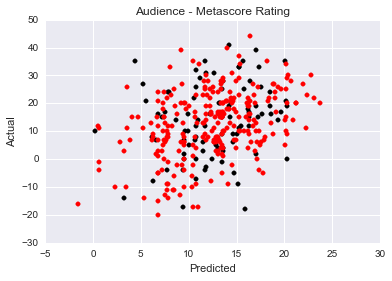

In [498]:
# Explained variance score: 1 is perfect prediction
print('Train Variance score: %.2f' % linreg.score(X_train, Y_train))
print('Test Variance score: %.2f' % linreg.score(X_test, Y_test))

# Plot outputs
plt.scatter(linreg.predict(X_test), Y_test,  color='black')
plt.scatter(linreg.predict(X_train), Y_train,  color='red')
plt.title('Audience - Metascore Rating')
plt.xlabel('Predicted')
plt.ylabel('Actual')


#plt.plot(X_test, linreg.predict(X_test), color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [499]:
#cat input1.csv input2.csv input3.csv > combined.csv